Regresión robusta usando RANSAC --- 6:41 min
=====

* 6:41 min | Ultima modificación: Abril 13, 2021 | [YouTube](https://youtu.be/a_Wwi9BgHxc)

Fuente: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

Coeficientes:
 82.1904
 54.1724
 82.0853



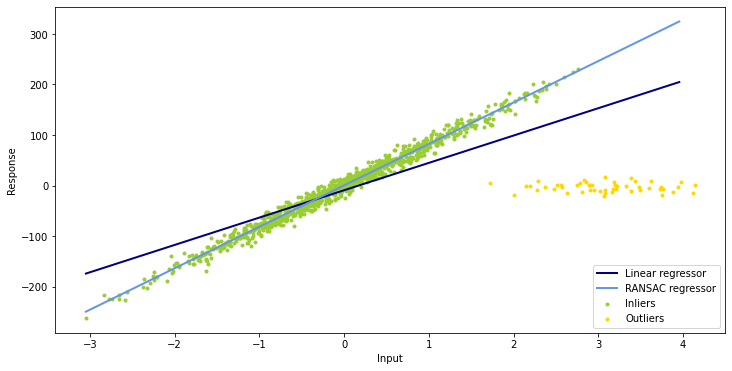

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model

plt.figure(figsize=(12, 6))

n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

#
# Adiciona outliers a los datos
#
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

#
# Ajusta un modelo lineal a todos los datos
#
lr = linear_model.LinearRegression()
lr.fit(X, y)

#
# Regresión robusta usando RANSAC
#
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

#
# Pronostico
#
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

#
# Comparación de los coeficientes
#
print("Coeficientes:")
print(
    "{:8.4f}\n{:8.4f}\n{:8.4f}\n".format(
        float(coef),
        float(lr.coef_[0]),
        float(ransac.estimator_.coef_),
    )
)

#
# Gráfica
#
lw = 2
plt.scatter(
    X[inlier_mask],
    y[inlier_mask],
    color="yellowgreen",
    marker=".",
    label="Inliers",
)
plt.scatter(
    X[outlier_mask],
    y[outlier_mask],
    color="gold",
    marker=".",
    label="Outliers",
)
plt.plot(
    line_X,
    line_y,
    color="navy",
    linewidth=lw,
    label="Linear regressor",
)
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()